In [194]:
import pandas as pd

In [195]:
binary_hydride = pd.read_table('./new-二元氢化物.dat', sep=',')
binary_hydride.sort_values(by=['Tc(K)', '压力(GPa)'], ascending=True, inplace=True)
binary_hydride.drop(labels=[4,8], inplace=True)
binary_hydride.drop_duplicates(subset=['化合物', 'theoryorexp'], keep='last', inplace=True)

binary_hydride.head(5)
binary_hydride.shape

(33, 8)

In [196]:
# 找不到着两个结构的文献
# null	(Y,Ce)H9	clathrate	null	140	120	exp	null
# null	(La,Ce)H10	clathrate	null	175	155	exp	null
ternary_hydride = pd.read_table('./new-三元氢化物总结.dat', sep='\t')
ternary_hydride.drop(labels=9, inplace=True)

In [253]:
total_hydrides = pd.concat([binary_hydride, ternary_hydride], axis=0)
# print(total_hydrides.shape)

exp_h = total_hydrides[total_hydrides['theoryorexp']=='exp']
theory_h = total_hydrides[total_hydrides['theoryorexp']=='theory']

# print(exp_h.shape)
# print(theory_h.shape)

# total_hydrides[(total_hydrides['压力(GPa)']>200) & (total_hydrides['压力(GPa)']<300)]
# print(total_hydrides.head(5))
dst_type = total_hydrides[total_hydrides['化合物']=='YH10'].get('类型')
print(dst_type)
if  dst_type.astype(str) == 'clathrate':
    print(dst_type)

10    clathrate
Name: 类型, dtype: object


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

将字符串标签映射为数值

In [198]:
def labels_str2number(inputlables: list[str]):
    """
    input a list[float]
    return a list[int]
    """
    lab_value = []
    for lab in inputlables:
        if lab == 'theory':
            lab_value.append(1)
        elif lab == 'exp':
            lab_value.append(0)
        else:
            lab_value.append(0.5)
    
    return lab_value

33 33 33


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

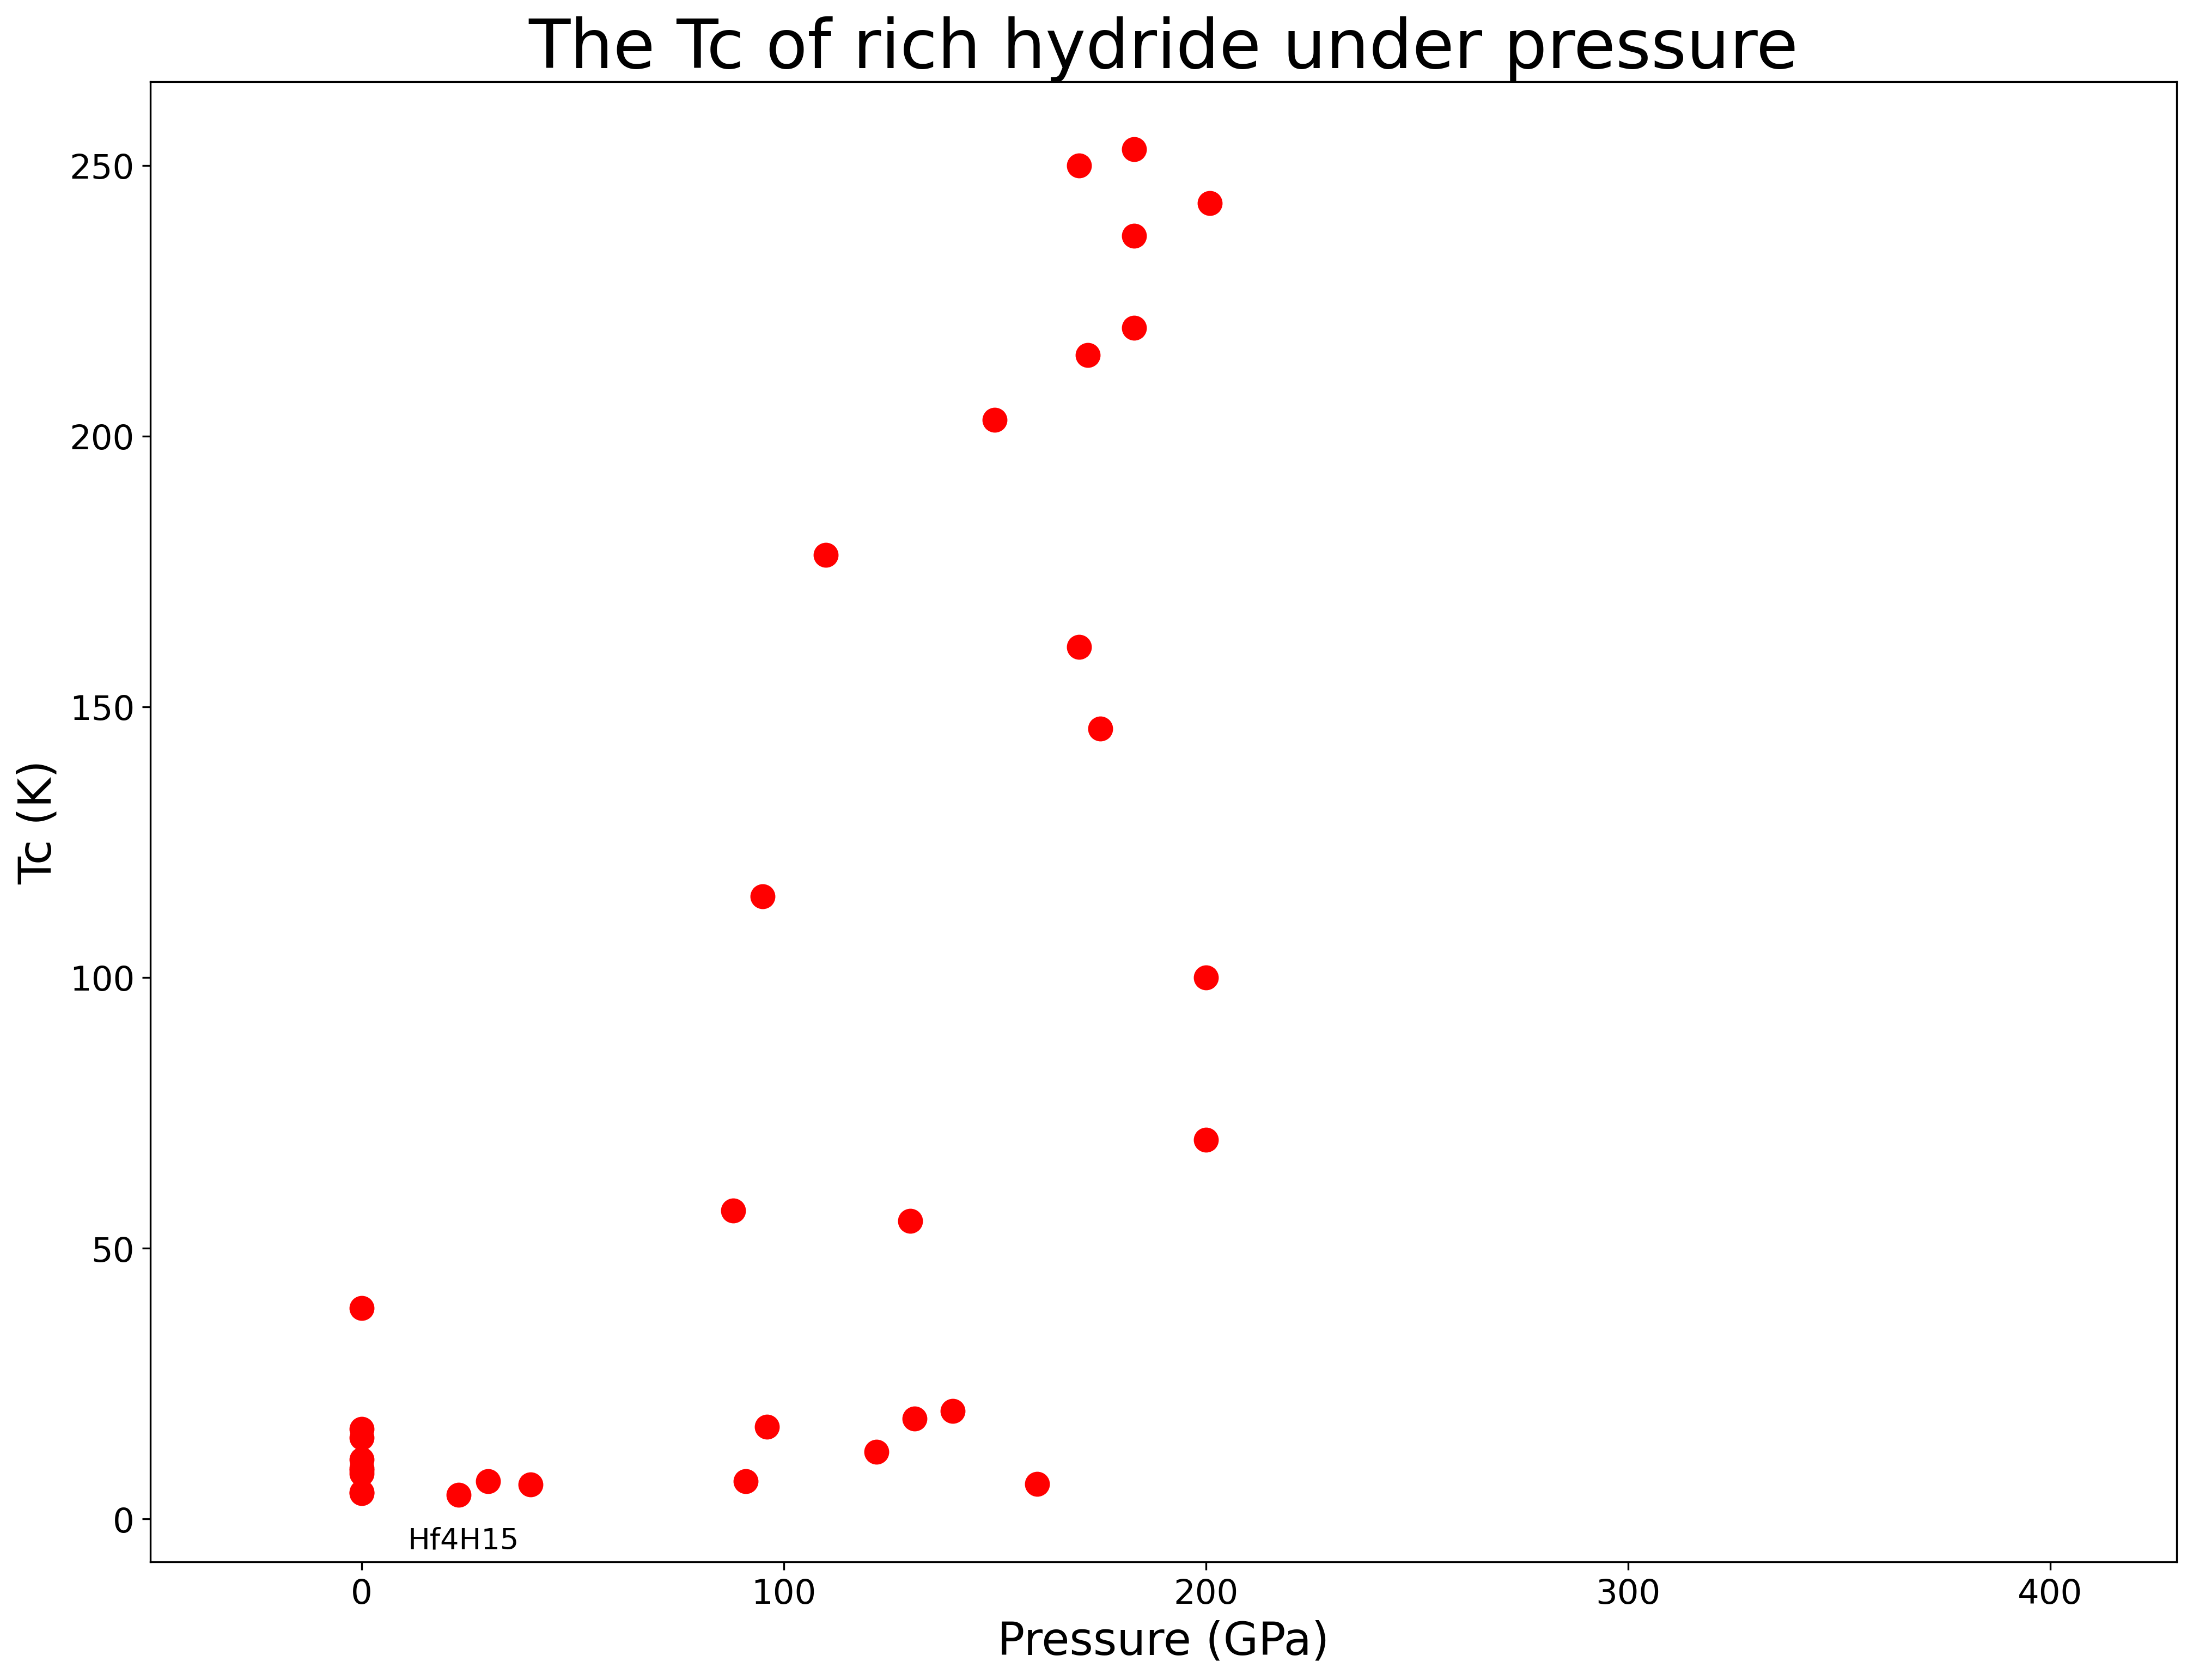

In [248]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12),dpi=300)
plt.xlabel("Pressure (GPa)",  fontsize=20)
plt.xlim((-50,430))
plt.ylabel("Tc (K)",  fontsize=20)
plt.title("The Tc of rich hydride under pressure",fontsize=30)
plt.tick_params(labelsize=15)


# Experiment
exp_X = exp_h['压力(GPa)'].tolist()
exp_Y = exp_h['Tc(K)'].tolist()
exp_annotations=exp_h['化合物'].tolist()
print(len(exp_X), len(exp_Y), len(exp_annotations))

plt.scatter(exp_X, exp_Y, s=100, c='r', label='exp')
for i, label in enumerate(exp_annotations):
    if label not in ['NbH0.69', 'Pd0.55Cu0.45H0.04', 'HfV2H']:
        if label == 'PdH':
            plt.annotate(label+'(11K)', (exp_X[i]-35, exp_Y[i]+7), fontsize=13)
        elif label == 'PrH9':
            plt.annotate(label+'(9K)', (exp_X[i]-35, exp_Y[i]+0), fontsize=13)
        elif label == 'Th4H15':
            plt.annotate(label+'(~8K)', (exp_X[i]-47, exp_Y[i]-9), fontsize=13)
        elif label == 'NdH9':
            plt.annotate(label+'(5K)', (exp_X[i]-35, exp_Y[i]-14), fontsize=13)
        elif label == 'PtH':
            plt.annotate(label, (exp_X[i], exp_Y[i]+3), fontsize=13)
        elif label == 'Hf4H15':
            plt.annotate(label, (exp_X[i]-12, exp_Y[i]-10), fontsize=13)
        elif label == 'ScH3':
            plt.annotate(label, (exp_X[i]-8, exp_Y[i]+5), fontsize=13)
        elif label == 'LuH3':
            plt.annotate(label, (exp_X[i]-1, exp_Y[i]-12), fontsize=13)
        elif label == 'YH9':
            plt.annotate(label, (exp_X[i]+3, exp_Y[i]-8), fontsize=13)
        elif label == 'LaH10':
            plt.annotate(label, (exp_X[i]-20, exp_Y[i]+3), fontsize=13)
        elif label == 'NaH4C60':
            plt.annotate(label+'(15K)', (exp_X[i]+2, exp_Y[i]+7), fontsize=13)
        elif label == '(La,Y)H10':
            plt.annotate(label, (exp_X[i]-6, exp_Y[i]+10), fontsize=13)
        elif label == '(La,Y)H6':
            plt.annotate(label, (exp_X[i]-20, exp_Y[i]), fontsize=13)
        elif label == 'CaH6':
            plt.annotate(label, (exp_X[i]+3, exp_Y[i]-10), fontsize=13)
        elif label == 'BaReH9':
            plt.annotate(label, (exp_X[i]-2, exp_Y[i]-12), fontsize=13)
        elif label == 'Li5MoH11':
            plt.annotate(label, (exp_X[i]-10, exp_Y[i]-13), fontsize=13)
        else:
            dst_type = total_hydrides[total_hydrides['化合物']==label]['类型']
            if dst_type.astype(str) == 'clathrate':
                plt.annotate(label, (exp_X[i]+3, exp_Y[i]), fontsize=13, color='green')

# Theory 
theory_X = theory_h['压力(GPa)'].tolist()
theory_Y = theory_h['Tc(K)'].tolist()
theory_annotations=theory_h['化合物'].tolist()
print(len(theory_X), len(theory_Y), len(theory_annotations))

plt.scatter(theory_X, theory_Y, s=100, c='b', label='theory')

for i, label in enumerate(theory_annotations):
    if label not in ['xx',]:
        if label == 'SrH10':
            plt.annotate(label, (theory_X[i]+3, theory_Y[i]-6), fontsize=13)
        elif label == 'AcH16':
            plt.annotate(label, (theory_X[i]-24, theory_Y[i]-8), fontsize=13)
        elif label == 'Li2LaH17':
            plt.annotate(label, (theory_X[i]-24, theory_Y[i]+4), fontsize=13)
        elif label == 'Li2YH17':
            plt.annotate(label, (theory_X[i]+3, theory_Y[i]+2), fontsize=13)
        elif label == 'LaSH6':
            plt.annotate(label, (theory_X[i]+2, theory_Y[i]+3), fontsize=13)
        else:
            plt.annotate(label, (theory_X[i]+3, theory_Y[i]), fontsize=13)


plt.plot([-50, 430], [77, 77], linestyle='dashed', c='b')
plt.text(-48, 285, 'Room Temperature 300 K', fontsize=16, color='b')
plt.plot([-50, 430], [300, 300], linestyle='dashed', c='b')
plt.text(-48, 65, 'Liquid Nitrogen Temperature', fontsize=16, color='b')

# 最终显示
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [200]:
import pandas as pd
score = [[34,67,87],[68,98,58],[75,73,86],[94,59,81]]
name = ['laoba','laoliu','xiaoxiao']
course = ['chinese','math','english','history']
mydata = pd.DataFrame(data=score,columns=name,index=course)#指定行列名
print(mydata)

 #选择两列，此时必须用[]将两列括起来，否则报错
mydata[['laoba','laoliu']]
mydata.loc[:,'laoba']
mydata.iloc[0,:]


         laoba  laoliu  xiaoxiao
chinese     34      67        87
math        68      98        58
english     75      73        86
history     94      59        81


laoba       34
laoliu      67
xiaoxiao    87
Name: chinese, dtype: int64